<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF OPE - 2022-2023</span></p>
<p><font size="4">  UE Machine Learning and advanced processing methods for multi-sensor data  </font></p>
<p></p>
<p><font size="5">  Notebook 04: Python lab - Neural Network </font></p>
</p></br>
</p>
</CENTER>

In this TP, we will build an Artificial Neural Networks (ANN) with one input layer, one hidden layer, and one output layer. We will apply this neural network to find non-linear boundaries



<img src="2560px-Neural_network.png" width="500" height="400">


We have two input $x_1$ and $x_2$. There is a signle hidden layer with $p$ units (nodes): $h_1, h_2, \ldots, h_p$. Finnaly, there is one output $t$. The arrows that connect them are the weights. There are two weights matrices: $W \in R^{2\times p}$ and $U \in R^{p\times 1}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from sklearn.datasets import   make_moons
from sklearn.model_selection import train_test_split

#### Question 1: Define  sigmoid  activiation function  

In [100]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


#### Question 2: Define prediction function

In [101]:
def myPrediction(W, U,x):
    h=np.dot(W,x)
    sig_h=sigmoid(h)
    y=np.dot(U,sig_h)
    t=sigmoid(y)

    return (sig_h,t)

#### Question 3: Build our own neural network

In [120]:
def myNeuralNetwork(X, Y, hidden_dim, alpha, W, U):
  for n in range(X.shape[0]):
    x = np.array(X[n,:], ndmin=2).T
    y = Y[n]

    h_predicted=myPrediction(W, U,x)[0]
    y_predicted=myPrediction(W, U,x)[1]

    #Calcul de l'erreur
    erreur= y_predicted-y
    #Calcul de loss
    Loss=0.5*erreur**2





    dU=np.dot(y_predicted*(1-y_predicted)*erreur,h_predicted.T )
    #Backpropagation
    #dZ1 = (U.T @ dU) * (1 - h_predicted**2)
    #dW = dZ1 @ x.T
    dW=np.dot(h_predicted*(1-h_predicted)*np.dot(dU, U.T),x.T)





    # update the weight for the link between the hidden and the output layers
    U -=alpha*dU

    # update the weight for the link between the input and the hidden layers
    W -=alpha*dW


  loss = (0.5 * np.mean(np.square(myPrediction(W, U, x)[1] - Y)))
  accuracy = (np.round(myPrediction(W, U, x)[1])==Y).mean()

  return W, U,loss,accuracy






La variable loss Calculate the mean squared error (MSE) loss for a set of predictions and actual values.

    Parameters:
    - predictions (numpy array): Model predictions for the dataset.
    - actual_values (numpy array): Actual target values for the dataset.

    Returns:
    - float: Mean squared error loss for the epoch.
    """

#### Question 4: Create non-linear data by using make_moons function from sklearn dataset. Then use train_test_split function to divide the created dataset into training set and test set

In [ ]:
num_points = 300

X, y = make_moons(num_points, noise=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_train),np.shape(Y_train))




(240, 2) (240,)


#### Question 5: Visualize the dataset

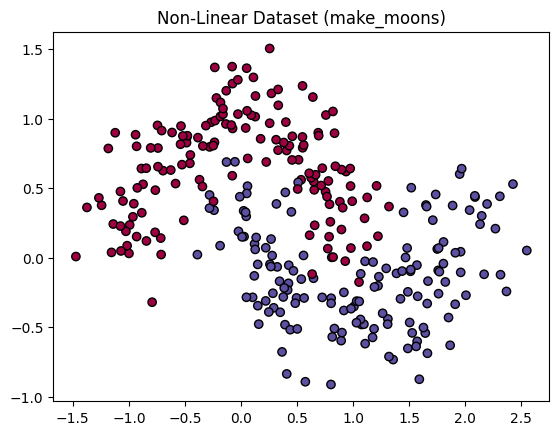

In [103]:
 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title('Non-Linear Dataset (make_moons)')

plt.show()

#### Question 6: Train our network with hidden dimensionality = 10 with epochs = 5. Then test the performance of our prediction  

(10, 2)
(1, 10)


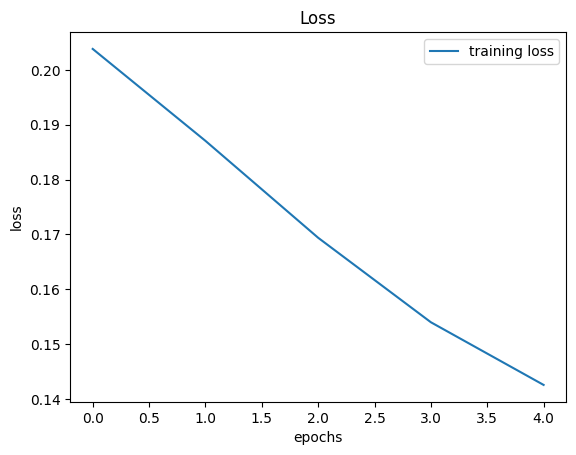

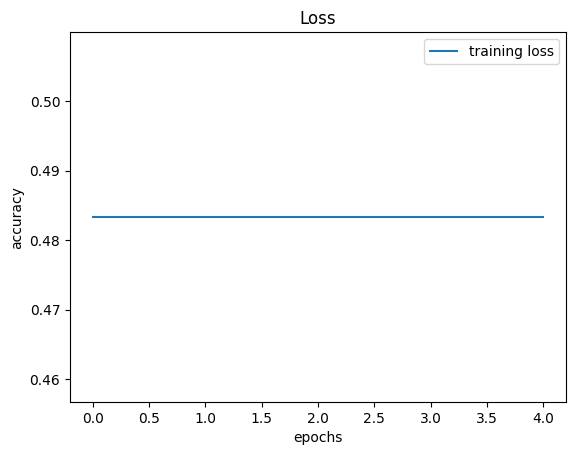

In [121]:
hidden_dim =10
alpha= 0.01 # learning rate for gradient descent
input_dim = 2

# weight matrix for Hidden layer
W = np.random.randn(hidden_dim, input_dim)
print(W.shape)
# weight matrix for output layer
U = np.random.randn(1, hidden_dim)
print(U.shape)

# epochs is the number of times the training data set is used for training
epochs =5

loss_list = []
acc_list = []
for e in range(epochs):
    W, U,loss, acc = myNeuralNetwork(X_train, Y_train, hidden_dim, alpha, W, U)
    loss_list.append(loss)
    acc_list.append(acc)

plt.figure(1)
plt.plot(loss_list, label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.figure(2)
plt.plot(acc_list, label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# using prediction function to predict the labels of test set


#### Question 7: Train our network with hidden dimensionality = 100. Then test the performance of our prediction. Give your remarks

(100, 2)
(1, 100)


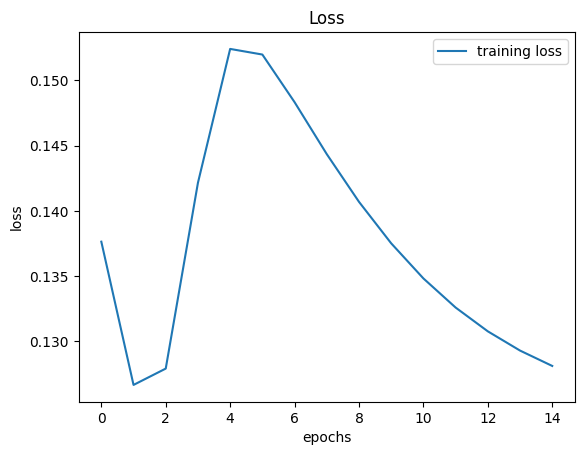

In [123]:
hidden_dim =100
alpha= 0.01 # learning rate for gradient descent
input_dim = 2

# weight matrix for Hidden layer
W = np.random.randn(hidden_dim, input_dim)
print(W.shape)
# weight matrix for output layer
U = np.random.randn(1, hidden_dim)
print(U.shape)

# epochs is the number of times the training data set is used for training
epochs =15
loss_list = []
acc_list = []
for e in range(epochs):
    W, U,loss, acc = myNeuralNetwork(X_train, Y_train, hidden_dim, alpha, W, U)
    loss_list.append(loss)
    acc_list.append(acc)

plt.plot(loss_list, label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()